# ch8. 중심 극한 정리

통계적 추론을 표본의 특징으로부터 모집단의 특징을 추론하는 것이라고 했습니다. 이 때 중요한 역할을 하는 것이 중심극한 정리입니다.

모집단이 평균은 μ, 표준 편차는 σ^2를 따르는 임의의 분포일 때, 표본의 크기가 충분히 크다면 표본 평균의 분포는 평균이 μ, 분산은 σ^2/n인 정규분포를 따른다.

$$\bar{X}\sim N(\mu,\frac{\sigma^2}{n})$$

여기서 충분히 큰 표본의 크기는 보통 30을 잡습니다. 중심 극한 정리는 수학적으로 증명되었으나, 이는 너무 복잡하므로 직접 시뮬레이션을 돌려보면서 실제로 모집단의 분포와 관계 없이, 표본 평균의 분포가 정규분포를 이루는지 확인해보겠습니다.

In [23]:
# 중심 극한 정리 : 모집단의 분포를 모르고 & 모집단이 정규분포를 따르던지 안 따르던지 간에 표본 평균의 분포는 정규붙포를 따른다
# 예) 샘플 표본 집단 30명을 뽑아서 평균 내는 걸 100번 반복해서 그래프를 그려보면 정규분포를 따른다는 것을 확인할 수 있음.

In [1]:
import pandas as pd

df = pd.read_csv("./data/titanic_train.csv")

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 모집단 분포 확인
Fare 컬럼에 대해서 히스토그램을 그려보면, 왼쪽으로 쏠린 분포를 갖는걸 확인할 수 있습니다.

<Axes: ylabel='Frequency'>

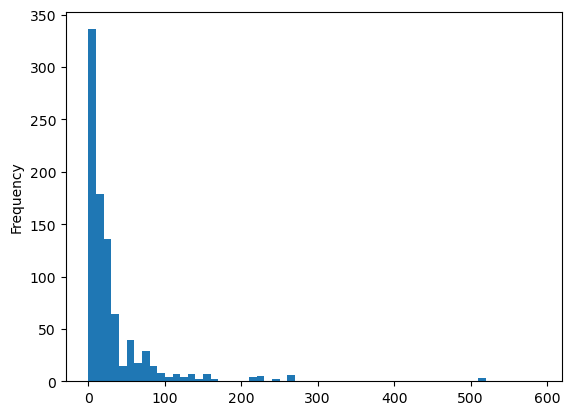

In [4]:
import numpy as np
df["Fare"].plot(kind="hist", bins=np.arange(0,600,10))

### 모평균과 모표준편차 확인
모평균은 32, 모표준편차는 49입니다.

In [6]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

중심 극한 정리에 따르면 표본 평균은 평균이 32, 표준 편차가 49 / 샘플의 수의 제곱근인 정규 분포를 따라야 합니다. 한번 샘플의 수가 30이라고 가정하고, 표본 평균의 확률 밀도 함수(probaility density function, pdf)를 그려보겠습니다.

In [7]:
from scipy.stats import norm
import math

sample_size = 30
sample_mean = 32.2
sample_std = 49.7 / math.sqrt(sample_size)
x = np.arange(0, 80, 1)
pdf = norm.pdf(x, loc=sample_mean, scale=sample_std)

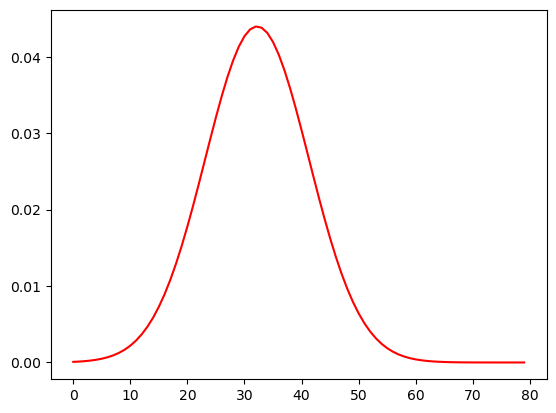

In [8]:
from matplotlib import pyplot as plt

plt.plot(pdf, color="red")

### 시뮬레이션
실제로 표본을 추출해서 평균을 구하는 과정을 반복해서 표본 평균이 정규 분포를 따르는지 확인해봅니다.

In [9]:
def get_sample_mean(sample_size):
    return df["Fare"].sample(sample_size).mean()


In [18]:
num_trials = 10000  # 천,만 번 반복해서 샘플링 하겠다

#sample_mean_list = [get_sample_mean(sample_size) for x in range(num_trials)]
sample_mean_list = []
for i in range(num_trials):
    sample_mean = get_sample_mean(sample_size)
    sample_mean_list.append(sample_mean)

In [19]:
#sample_mean_list

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


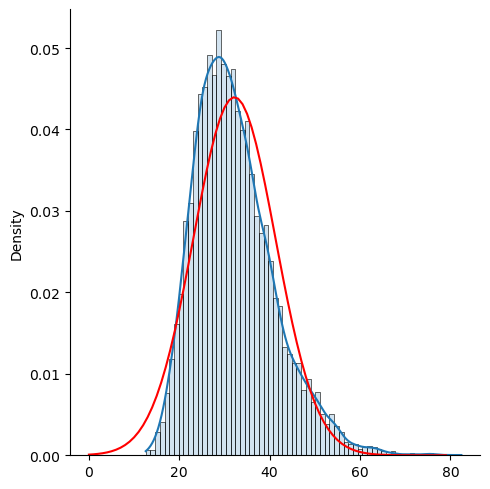

In [22]:
import seaborn as sns

sns.displot(
    sample_mean_list,
    stat="density",    # y축을 cnt가 아니라 정규화 시키기
    alpha=0.2,    # 막대 투명도
    kde = True    # 선
)

plt.plot(pdf, color="red")

In [ ]:
## 왼쪽으로 쏠렸던 그래프가 표본을 뽑아서 돌려봤더니

### 중심 극한 정리의 의의
중심 극한 정리는 통계적 추론에 핵심적인 역할을 합니다. 많은 통계적 추론 방법은 정규분포 가정에 기초하고 있으며, 중심 극한 정리는 이러한 가정의 타당성을 뒷받침해줍니다. 즉, 표본 평균이나 합 등이 정규분포에 근사하게 되면, 이를 통해 신뢰구간 추정, 가설 검정 등의 통계적 분석을 수행할 수 있게 됩니다.

In [ ]:
## 중심 극한 정리 - 면접 질문 => 정의해봐라, 해석해보기